# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_challenge import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+"&appid="+weather_api_key+"&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto lleras
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | smithers
Processing Record 5 of Set 1 | mili
Processing Record 6 of Set 1 | quibdo
Processing Record 7 of Set 1 | moquegua
Processing Record 8 of Set 1 | cestos city
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | alaghsas
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | colonia
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | laojunmiao
Processing Record 18 of Set 1 | businga
Processing Record 19 of Set 1 | xiva
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | olgii
C

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto lleras,3.0223,-73.4044,31.56,54,93,0.73,CO,1728917557
1,puerto ayora,-0.7393,-90.3518,21.42,95,89,1.79,EC,1728917559
2,port-aux-francais,-49.3500,70.2167,2.43,66,40,11.95,TF,1728917560
3,smithers,54.7804,-127.1743,7.18,100,75,1.03,CA,1728917561
4,mili,6.0815,171.7350,29.21,74,64,5.95,MH,1728917562


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto lleras,3.0223,-73.4044,31.56,54,93,0.73,CO,1728917557
1,puerto ayora,-0.7393,-90.3518,21.42,95,89,1.79,EC,1728917559
2,port-aux-francais,-49.3500,70.2167,2.43,66,40,11.95,TF,1728917560
3,smithers,54.7804,-127.1743,7.18,100,75,1.03,CA,1728917561
4,mili,6.0815,171.7350,29.21,74,64,5.95,MH,1728917562


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

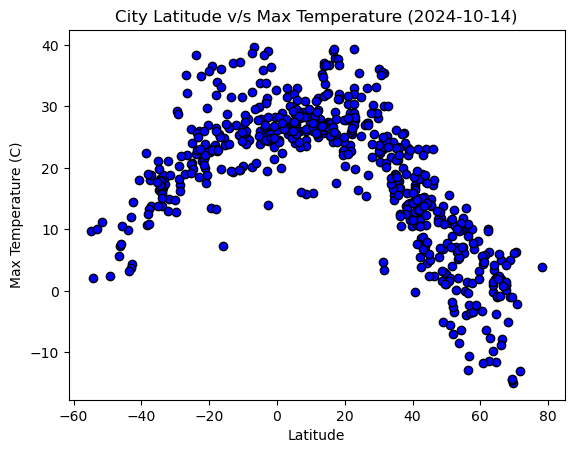

In [10]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker='o', facecolors="blue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude v/s Max Temperature (2024-10-14)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

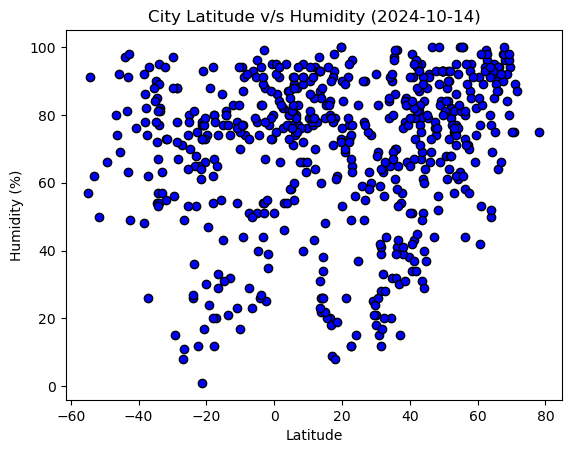

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values_2=city_data_df["Lat"]
y_values_2=city_data_df["Humidity"]
plt.scatter(x_values_2, y_values_2, marker='o', facecolors="blue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude v/s Humidity (2024-10-14)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

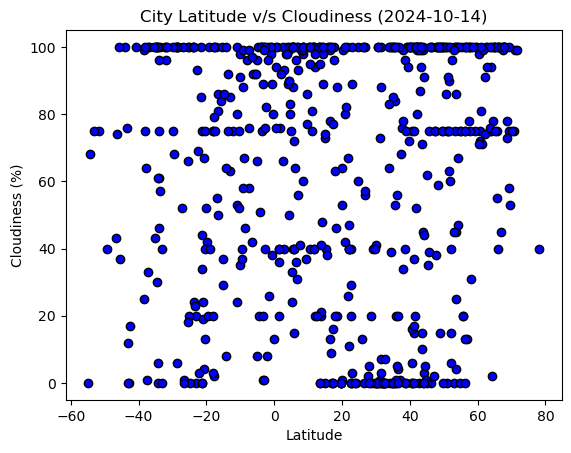

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values_3=city_data_df["Lat"]
y_values_3=city_data_df["Cloudiness"]
plt.scatter(x_values_3, y_values_3, marker='o', facecolors="blue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude v/s Cloudiness (2024-10-14)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

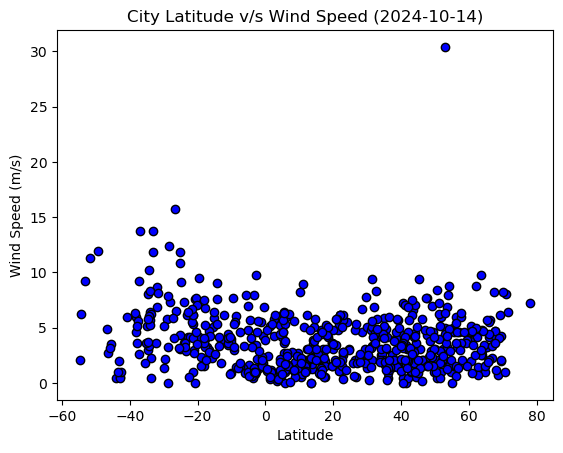

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values_4=city_data_df["Lat"]
y_values_4=city_data_df["Wind Speed"]
plt.scatter(x_values_4, y_values_4, marker='o', facecolors="blue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude v/s Wind Speed (2024-10-14)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def line_regression(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values=(x*slope)+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    (r,p)=st.pearsonr(x,y)
    print(f"The r^2-value is {(r*r)}")

    plt.scatter(x, y, marker='o', facecolors="blue", edgecolor="black")
    plt.xlabel("Latitude")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, (a,b),fontsize=12, color="red")
    


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto lleras,3.0223,-73.4044,31.56,54,93,0.73,CO,1728917557
3,smithers,54.7804,-127.1743,7.18,100,75,1.03,CA,1728917561
4,mili,6.0815,171.7350,29.21,74,64,5.95,MH,1728917562
5,quibdo,5.6947,-76.6611,27.19,89,40,0.00,CO,1728917563
7,cestos city,5.4600,-9.5828,24.12,91,100,3.58,LR,1728917565


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,21.42,95,89,1.79,EC,1728917559
2,port-aux-francais,-49.3500,70.2167,2.43,66,40,11.95,TF,1728917560
6,moquegua,-17.1956,-70.9353,25.49,20,100,3.29,PE,1728917484
9,adamstown,-25.0660,-130.1015,20.79,80,100,10.89,PN,1728917568
11,arraial do cabo,-22.9661,-42.0278,25.98,53,20,6.17,BR,1728917570


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is 0.7239801599548774


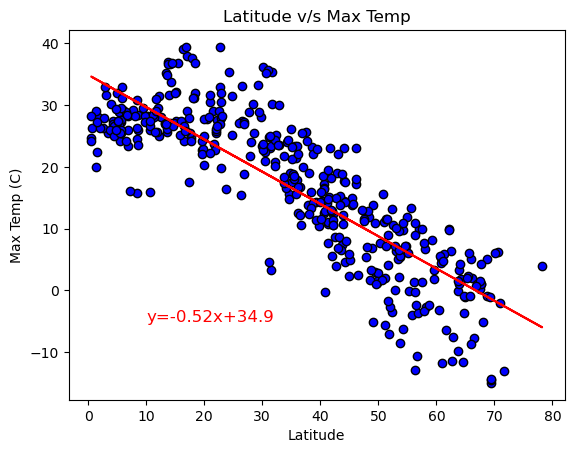

In [17]:
# Linear regression on Northern Hemisphere
line_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 10, -5)
plt.ylabel("Max Temp (C)")
plt.title("Latitude v/s Max Temp")


plt.show()


The r^2-value is 0.5015526678815166


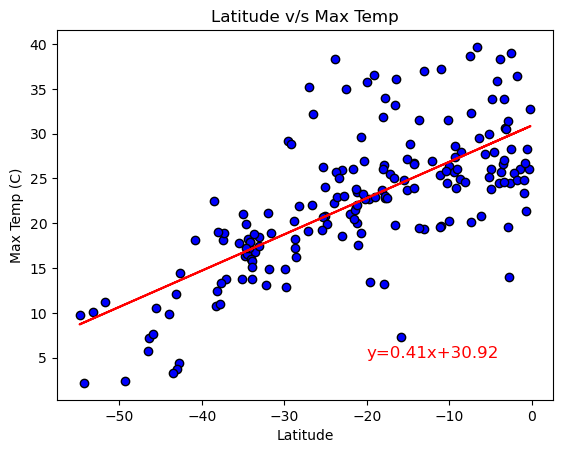

In [18]:
# Linear regression on Southern Hemisphere
line_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -20, 5)
plt.ylabel("Max Temp (C)")
plt.title("Latitude v/s Max Temp")

plt.show()

**Discussion about the linear relationship:** The coefficient of determination for the northern and southern hemispheres suggests that there is a moderate to strong correlation between the latitude and the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is 0.025540381683899188


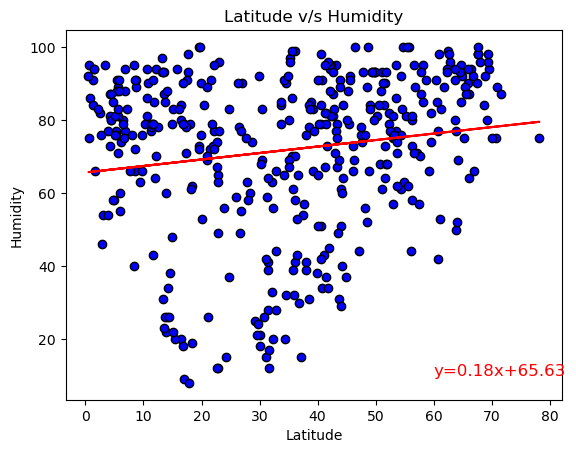

In [19]:
# Northern Hemisphere
line_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 60, 10)
plt.ylabel("Humidity")
plt.title("Latitude v/s Humidity")

plt.show()

The r^2-value is 0.010203701647321354


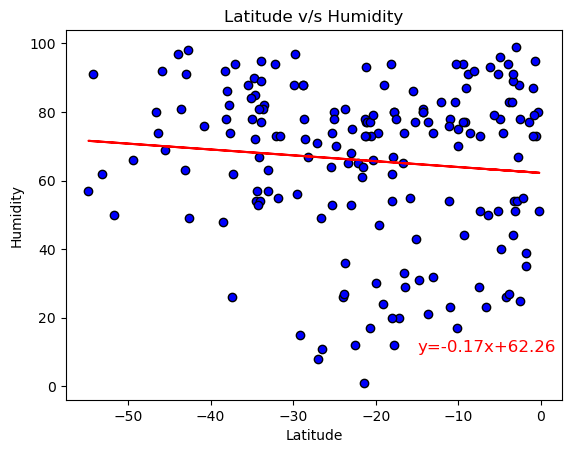

In [22]:
# Southern Hemisphere
line_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -15, 10)
plt.ylabel("Humidity")
plt.title("Latitude v/s Humidity")

plt.show()

**Discussion about the linear relationship:** Both r^2 value for northern and southern hemispheres suggest that there is almost a non-existent relationship between latitude and humidity since they are very close to zero.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is 0.008068939854756851


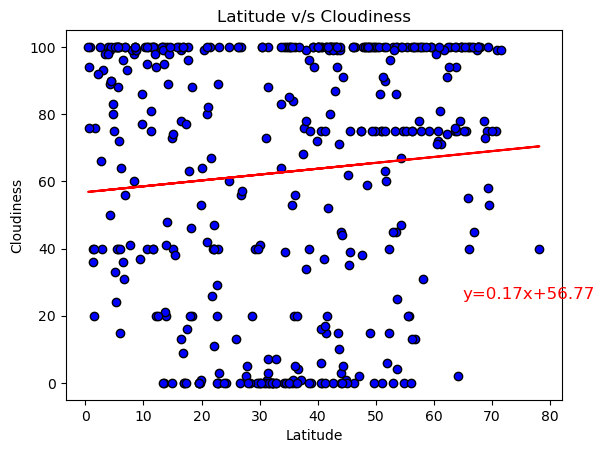

In [23]:
# Northern Hemisphere
line_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 65, 25)
plt.ylabel("Cloudiness")
plt.title("Latitude v/s Cloudiness")

plt.show()

The r^2-value is 0.009033430590284676


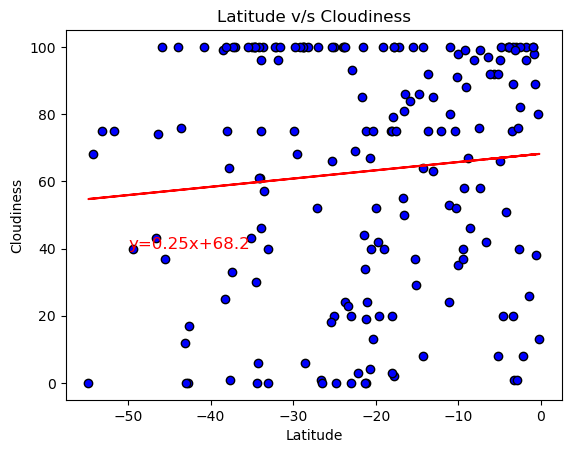

In [24]:
# Southern Hemisphere
line_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -50, 40)
plt.ylabel("Cloudiness")
plt.title("Latitude v/s Cloudiness")

plt.show()

**Discussion about the linear relationship:** The r^2 value for northern and southern hemispheres suggest that there is an almost non-existent relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is 0.02888206559951146


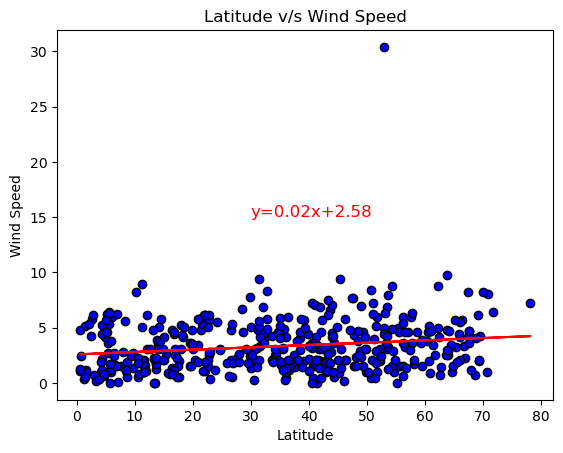

In [25]:
# Northern Hemisphere
line_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 30, 15)
plt.ylabel("Wind Speed")
plt.title("Latitude v/s Wind Speed")

plt.show()

The r^2-value is 0.07182379486667279


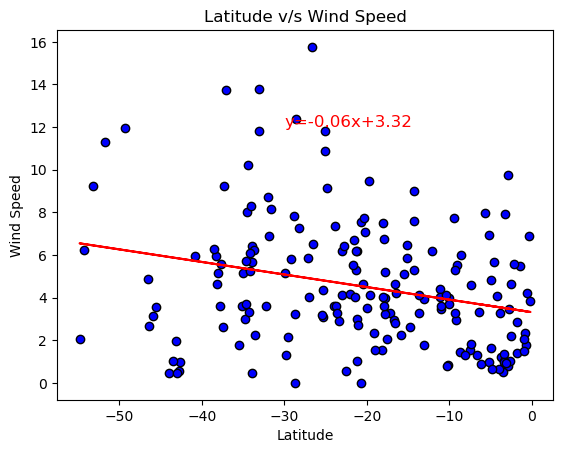

In [26]:
# Southern Hemisphere
line_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -30, 12)
plt.ylabel("Wind Speed")
plt.title("Latitude v/s Wind Speed")

plt.show()

**Discussion about the linear relationship:**   Both r^2 values for northern and southern hemispheres suggest that there is a very weak relationship between latitude and Wind Speed.